# Here I will code graphs to simulate long-term random simulations of our process and compare to our closed-form formula. We will compare multiple simulation sample sizes and observe if convergence occurs.  


In [7]:
# imports
import random
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [8]:
@jit(nopython=True)
def sim1(n_1,a,b,p,q):
    """
    Function to simulate 1!!! "game" of n coin-flipping steps. 
    Note in our initial question we have a=1,b=2,p=q=1/2
    Parameters
    ----------
    n:int
        number of coinflips to be performed
    a:int
        number representing the number on side 1 of the coin
    b:int
        number representing the number on side 1 of the coin. 
    q:float
        q=P(a) in [0,1] represents the probability of a occurring in a biased coin
    p:float
        p=P(b) is in [0,1] and represents the probability of b occurring in a biased coin
    
    Returns
    ----------
    res:List
        List representing the "path" along the number line
    
    """
    res = [1]
    for i in range(n_1):
       
        if random.uniform(0,1) < 0.5:
            new_step = res[-1]+a
            res.append(new_step)
            
            
        else:
            
            res.append(res[-1]+b)
           
    return res



def sim2(sim_n,coinflip_n):
    """
    Function to simulate multiple!!! games of coin-flipping runs. 
    For each number we will accumulate an empirical probability. We will plot each numbers probability and 
    compare the graph produced with our closed-form solution we found. Note we want the number of coinflips to
    be greater than the number of simulations. This just allows us to index nicely and as explained in rubric 
    it doesnt change probabilities of lower numbers. 
    
    Parameters
    ----------
    sim_n: int
        The number of games we want to simulate.
    coinflip_n: int
        The number of coinflips we are performing
    
    Returns
    ----------  
    probs: List
        An array of empirical probabilities produced. 
    """
    counts = [0 for i in range(1,coinflip_n+1)]
    probabilities = [0 for i in range(1, coinflip_n + 1)]
    for i in range(0,sim_n):
        # res is a list consisting of the numbers we reach on our steps up to 10000
        # length of res is the number of coinflips
        res = sim1(coinflip_n,1,2,1/2,1/2)
        # if the number i is in our games sequence we then add 1 to the number of times it appeared. 
        for j in range(coinflip_n):
            if (j + 1) in res:
                counts[j] += 1
        
    # we then use the counts to calculate the probabilities.  
    probs = [(counts[i] / sim_n) for i in range(0,coinflip_n)]
     
    return probs

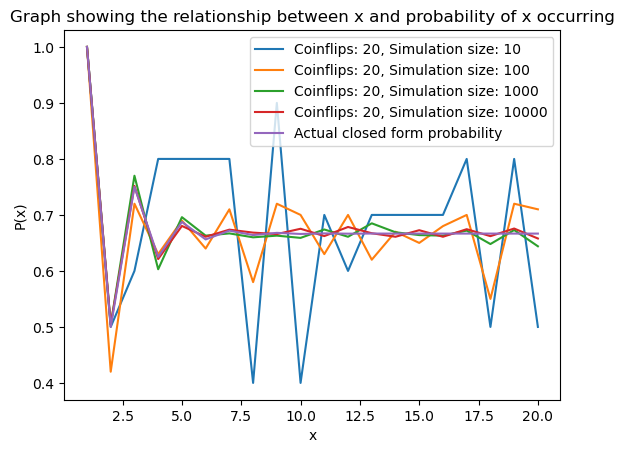

In [9]:
# functions to plot the graph of probabilities

def prob(n,a,b,p,q):
    """
    Function to return actual closed form probabilities. 
    We will then plot thos alongside a graph with emprirical probabilities to see alignment. 
    """
    x_points = [i for i in range(1,n+1)]
    ret = []
    for x in x_points:
        ret.append(1 / (p + 1) - (1 / (p + 1)) * (- p) ** x)
    return x_points,ret


def plots(max_coinflips,sim_n_list):
    """
    Function to plot empirical probabilities and closed form probabilities on the same axes with varying sample
    sizes. 
    Parameters:
    ----------
    max_coinflips: int
        The number of coinflips we want to perform in our game. 
    sim_n_array:List
    
    Returns:
    ----------
    None
    """
    # x,y are the actual plotted probabilties
    x, y = prob(max_coinflips,1,2,1/2,1/2)
    
    # simulate 100 times the coinflipping game up to 
    x_sims = [i for i in range(1,max_coinflips+1)]
    y_sims = [0 for i in range(len(sim_n_list))]
    for i in range(len(sim_n_list)): 
        # simulating for the various sample_sizes passed as parameter
        y_sims[i] = sim2(sim_n_list[i],max_coinflips)
        plt.plot(x_sims,y_sims[i],label=f"Coinflips: {max_coinflips}, Simulation size: {sim_n_list[i]}")
        
    # plot actual closed form probability
    plt.plot(x,y,label="Actual closed form probability")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.title("Graph showing the relationship between x and probability of x occurring")
    plt.legend()
    plt.show()
    return 
    
    
plots(20,[10,100,1000,10000])

# Comments on plot. 
# It seems our Proof and following theorems are valid. Empirical probabilities converge towards 2/3 as we increase the number of simulations. This is comforting and provides confidence in our closed form solution. 


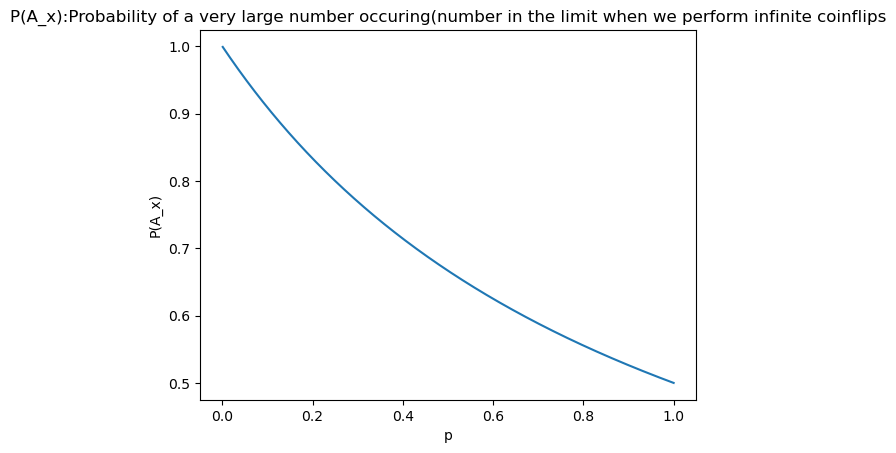

In [4]:
# Next we will plot the limits of the sequences for varying p. This is simply the graph 1/p+1
x_points=np.linspace(1/1000,1,1000)
y_points=[1/(1+x_points[i]) for i in range(len(x_points))]
plt.plot(x_points,y_points)
plt.title("P(A_x):Probability of a very large number occuring(number in the limit when we perform infinite coinflips")
plt.xlabel("p")
plt.ylabel("P(A_x)")
plt.show()

#  As p increases we tend to having the probability of a value occuring tend towards 1/2. 
# This makes intuitive sense as for large p we have a big probability of a 2 occuring each flip
# and hence we will skip every second value in the limit. 
# similarly when p is very close to 0 we expect to get hardly any 2's and therefor reach every number in the limit
# This Graph again is helpful to back up our closed-form answer.

#  Finally we aim to produce a graph showing some probabilities when we start with coprime a,b. eg a=2,b=5 starting labels which are coprime. We leave the coin fair without bias in this example. 

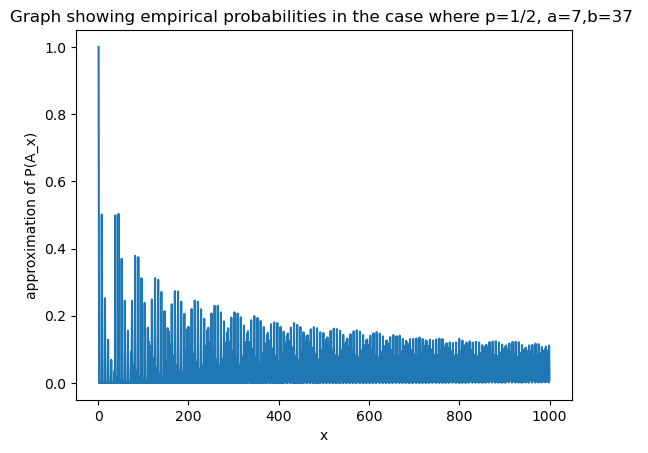

In [6]:
def sim2_coprime(sim_n,coinflip_n):
    """
    Function to simulate multiple!!! games of coin-flipping runs. 
    For each number we will accumulate an empirical probability. We will plot each numbers probability and 
    compare the graph produced with our closed-form solution we found. Note we want the number of coinflips to
    be greater than the number of simulations. This just allows us to index nicely and as explained in rubric 
    it doesnt change probabilities of lower numbers. 
    
    Parameters
    ----------
    sim_n: int
        The number of games we want to simulate.
    coinflip_n: int
        The number of coinflips we are performing
    
    Returns
    ----------  
    probs: List
        An array of empirical probabilities produced. 
    """
    counts = [0 for i in range(1,coinflip_n+1)]
    probabilities = [0 for i in range(1, coinflip_n + 1)]
    for i in range(0,sim_n):
        # res is a list consisting of the numbers we reach on our steps up to 10000
        # length of res is the number of coinflips
        res = sim1(coinflip_n,7,37,1/2,1/2)
        # if the number i is in our games sequence we then add 1 to the number of times it appeared. 
        for j in range(coinflip_n):
            if (j + 1) in res:
                counts[j] += 1
        
    # we then use the counts to calculate the probabilities.  
    probs = [(counts[i] / sim_n) for i in range(0,coinflip_n)]
     
    return probs
x_sims = [i for i in range(1,1000+1)]
y_sims=sim2_coprime(10000,1000)
plt.xlabel("x")
plt.ylabel("approximation of P(A_x)")
plt.title("Graph showing empirical probabilities in the case where p=1/2, a=7,b=37 ")
plt.plot(x_sims,y_sims)